**Task_2**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random
from random import randint

Відобразимо датасет petrol_consumption.csv, який даний нам для виконання домашнього завдання:

In [2]:
data = pd.read_csv('C:/Users/Vitalii/Downloads/Telegram Desktop/petrol_consumption.csv')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [3]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Побудуємо модель множинної регресії:

In [4]:
X = data.drop(columns = 'Petrol_Consumption').values
y = data['Petrol_Consumption'].values

In [5]:
X,y

(array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
        [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
        [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
        [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
        [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
        [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
        [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
        [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
        [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
        [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
        [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
        [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
        [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
        [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
        [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
        [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
        [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
        [7.000

In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression()

In [8]:
model.score(X, y)

0.6786867115698209

Згенеруємо нові дані X_new для знаходження y_pred:

In [9]:
d = {'X1': [randint(5, 10) for i in range(48)], 'X2': [randint(3063, 5342) for i in range(48)], 'X3': [randint(431, 17782) for i in range(48)], 'X4': [random.uniform(0.451, 0.724) for i in range(48)]}
df = pd.DataFrame(data=d)
X_new = df.values
X_new

array([[5.00000000e+00, 3.58500000e+03, 1.31310000e+04, 6.68181053e-01],
       [6.00000000e+00, 4.01100000e+03, 8.98900000e+03, 7.19179110e-01],
       [7.00000000e+00, 3.57400000e+03, 5.70400000e+03, 6.75911307e-01],
       [7.00000000e+00, 3.52900000e+03, 1.48020000e+04, 5.57684347e-01],
       [6.00000000e+00, 4.82100000e+03, 1.32500000e+03, 5.52289240e-01],
       [5.00000000e+00, 3.20100000e+03, 8.62200000e+03, 4.68855507e-01],
       [5.00000000e+00, 5.32600000e+03, 1.03730000e+04, 4.58199874e-01],
       [9.00000000e+00, 4.49800000e+03, 1.49550000e+04, 5.25557751e-01],
       [1.00000000e+01, 4.27300000e+03, 7.81000000e+02, 4.64643084e-01],
       [5.00000000e+00, 5.29800000e+03, 7.60800000e+03, 5.43838827e-01],
       [1.00000000e+01, 3.29800000e+03, 1.24650000e+04, 5.32034720e-01],
       [9.00000000e+00, 5.26100000e+03, 6.14100000e+03, 7.20772171e-01],
       [7.00000000e+00, 3.58300000e+03, 5.53000000e+02, 5.13916945e-01],
       [1.00000000e+01, 4.97800000e+03, 9.79200000e

In [10]:
y_pred = model.predict(X_new)

In [11]:
print(f"predicted response:\n{y_pred}")

predicted response:
[825.75551759 840.80291277 785.25586568 608.17727727 582.41817678
 595.87543335 435.88589075 430.76574929 363.93325021 558.91008208
 490.57870587 662.23450154 580.65505865 441.31530215 691.20032819
 684.85926449 631.23282504 667.639639   670.08587311 556.15045235
 543.01006138 627.83280195 620.79176985 739.67486184 453.691599
 768.33003587 643.20785637 574.23688566 686.07626242 536.92081924
 626.35684181 496.5396309  709.79351404 453.54754276 827.16398603
 609.17494881 514.99491755 555.48506611 476.73167366 647.35899071
 463.0794717  728.61722592 459.65200077 665.94739555 405.77107495
 769.66104057 695.7271275  686.07352275]


In [12]:
print(f"intercept: {model.intercept_}")

intercept: 377.2911464736734


In [13]:
print(f"coefficients: {model.coef_}")

coefficients: [-3.47901492e+01 -6.65887518e-02 -2.42588889e-03  1.33644936e+03]


Побудуємо графік:

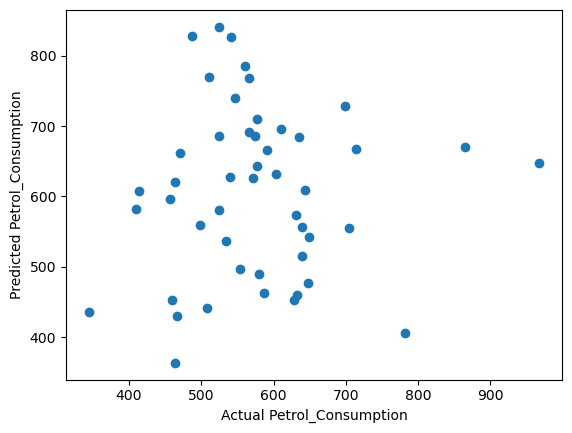

In [14]:
plt.scatter(y, y_pred)
plt.xlabel('Actual Petrol_Consumption')
plt.ylabel('Predicted Petrol_Consumption')
plt.show()

**Оцінка якості множинної регресії:**

In [17]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [18]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 133.06
Mean squared error: 25777.42
Root mean squared error: 160.55
